In [25]:
import time
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz
import scipy

### Graph generation

In [26]:
n = 100
m = 200
mat = np.zeros((n, n), dtype=int)
c = 0
while c < m:
    i = np.random.randint(n)
    j = np.random.randint(n)
    if (mat[i, j] == 0) and (i != j):
        mat[i, j] = 1
        mat[j, i] = 1
        c += 1

G = nx.from_numpy_matrix(mat)

### print m rows of adjacency matrix and adjacency list and visualize graph:

adjacency matrix:
[[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 

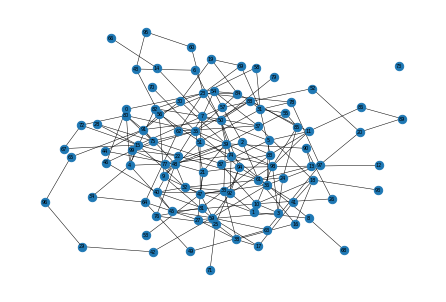

In [27]:
def gen_adjlist(G):
    al = []
    for s, nbrs in G.adjacency():
        al.append(list(nbrs.keys()))
    return al

G = nx.from_numpy_matrix(mat)

print("adjacency matrix:")
print(mat[:5, :])
print("adjacency list:")
print(gen_adjlist(G)[:5])

pos = nx.nx_agraph.graphviz_layout(G, prog='neato')
nx.draw(G, pos=pos, with_labels=True, node_size=70, width=0.5, font_size=5)
plt.savefig("graph.png", dpi=500)
plt.show()

### dfs

In [28]:
print("connected components: ")
source = 0
start = time.time()
visited = [False for i in range(n)]
for i in range(n):
    if not visited[i]:
        source = i
        l = list(nx.bfs_tree(G, source=source).nodes())
        print(l)
        for j in l:
            visited[j] = True
stop = time.time()
print("time: ", stop - start)

connected components: 
[0, 4, 23, 46, 15, 34, 45, 77, 82, 99, 50, 58, 60, 62, 69, 78, 84, 40, 75, 22, 28, 32, 57, 67, 72, 64, 10, 59, 39, 74, 7, 35, 6, 79, 88, 91, 94, 31, 95, 37, 19, 97, 54, 85, 81, 92, 80, 87, 9, 61, 1, 24, 33, 48, 2, 52, 27, 49, 3, 18, 26, 17, 36, 42, 63, 21, 30, 55, 90, 98, 51, 5, 14, 70, 43, 11, 44, 56, 65, 13, 25, 41, 83, 20, 76, 47, 16, 8, 38, 93, 29, 66, 86, 96, 12, 71, 89, 53, 68]
[73]
time:  0.0007526874542236328


### bfs

In [29]:
source = np.random.randint(n)
target = np.random.randint(n)
print("source node: ", source)
print("target node: ", target)
start = time.time()
try:
    res = nx.bidirectional_shortest_path(G, source=source, target=target)
    print(res)
    print("shortest path length: ", len(res) - 1)
except nx.NetworkXNoPath:
    print("There is no path between source and target nodes")

stop = time.time()
print("time: ", stop - start)

source node:  75
target node:  23
[75, 35, 84, 23]
shortest path length:  3
time:  0.00025010108947753906
